#import library


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



## read the dataset


In [2]:
data1 = pd.read_csv('/workspaces/ML/dataset/Fake.csv')
data2 = pd.read_csv('//workspaces/ML/dataset/True.csv')


In [3]:
# creat a new column to store the label
data1['label'] = 0
data2['label'] = 1


In [4]:
# merge the data
data = pd.concat([data1, data2], ignore_index=True)
# shuffe the data
data = data.sample(frac=1).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [5]:
data.head()

,title,text,subject,date,label
0,Slovenian President Pahor fails to win majorit...,LJUBLJANA (Reuters) - Slovenian President Boru...,worldnews,"October 22, 2017",1
1,Syrians vote in Kurdish-led regions of north,"QAMISHLI, Syria (Reuters) - Syrians voted on F...",worldnews,"September 22, 2017",1
2,Trump likely to visit China during November As...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"September 12, 2017",1
3,Trump says he believes Pakistan starting to re...,WASHINGTON (Reuters) - President Donald Trump ...,worldnews,"October 12, 2017",1
4,WATCH: HARRY REID Caught Calling Benghazi Moth...,Harry Reid s disrespectful comments are just a...,left-news,"Aug 24, 2016",0


In [6]:
data.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
# null values
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [8]:
# tạo feature và label
X = data['title'] + ' ' + data['text']
y = data['label']


In [9]:
# Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multinomial Naive Bayes (MNB)

In [28]:
# fit model X_train, y_train sử dung Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [31]:
# result 
print(model.score(X_train, y_train))



0.9461272899381925


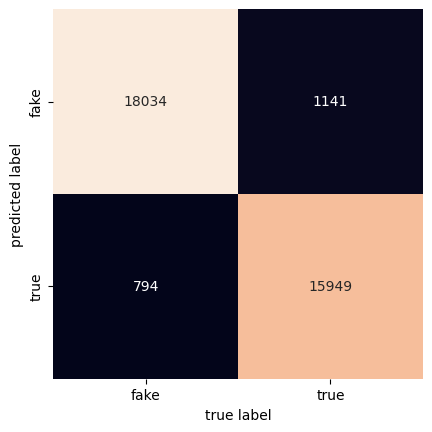

In [32]:
#confusion matrix cho tập train
y_train_pred = model.predict(X_train)
# sns heat map
mat = confusion_matrix(y_train, y_train_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['fake', 'true'], yticklabels=['fake', 'true'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()




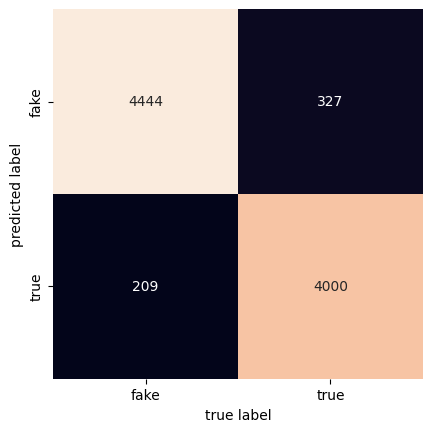

In [13]:
# train với tập test
y_test_pred = model.predict(X_test)
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['fake', 'true'], yticklabels=['fake', 'true'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


In [48]:
# result của tập test
print(model.score(X_test, y_test))

0.9403118040089087


In [14]:
# precision, recall, f1-score, support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4653
           1       0.95      0.92      0.94      4327

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [34]:
# chuyển giá trị label thành dạng text
def label_to_text(label):
    if label == 0:
        return 'fake'
    else:
        return 'true'

In [36]:
# dự đoán cho một title bất kì và kiểm tra xem nó là fake hay real
title = 'President Declares Mondays as National No-Work Day for Everyone.' # Đây là tin giả
print(label_to_text(model.predict([title])[0]))
title = 'Trump Declares National Emergency.' # Đây là tin thật
print(label_to_text(model.predict([title])[0]))



fake
true


# Sử dụng một mô hình SVM


In [16]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the SVM model
svm_model = SVC()

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Fit the model to the vectorized training data
svm_model.fit(X_train_vectorized, y_train)



SVC()

In [17]:
# in ra kết quả dự đoán cho tập train
y_pred_train = svm_model.predict(X_train_vectorized)
print(np.mean(y_pred_train == y_train))



0.9995266997048834


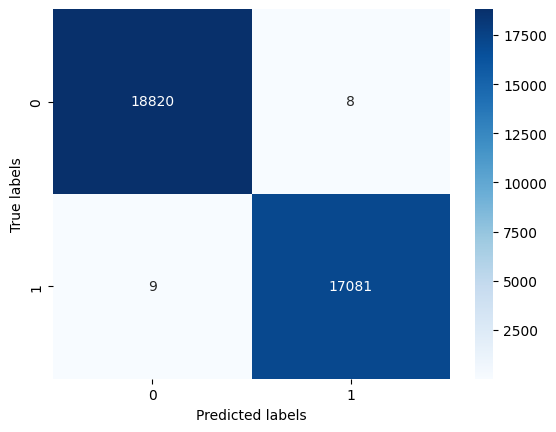

In [22]:
# confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [21]:
# áp dụng với tập test
X_test_vectorized = vectorizer.transform(X_test)
y_pred_test = svm_model.predict(X_test_vectorized)
print(np.mean(y_pred_test == y_test))


0.9951002227171493


Text(0.5, 23.52222222222222, 'Predicted labels')

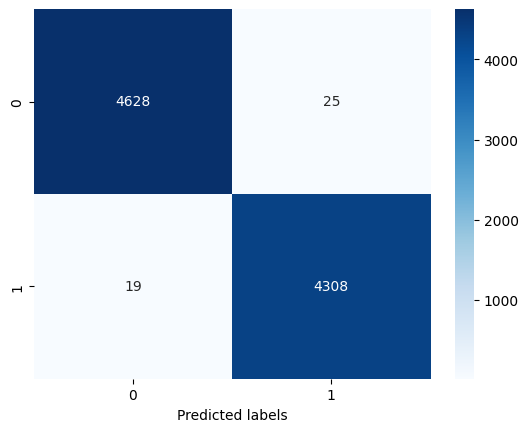

In [37]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')


In [38]:
# validataion
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4653
           1       0.99      1.00      0.99      4327

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [39]:
# dự đoán cho một title bất kì và kiểm tra xem nó là fake hay real
title = 'President Declares Mondays as National No-Work Day for Everyone.' # Đây là tin giả
print(label_to_text(model.predict([title])[0]))
title = 'Trump Declares National Emergency.' # Đây là tin thật
print(label_to_text(model.predict([title])[0]))



fake
true


# Mô hình KNN

In [49]:
# sử dụng model KNN
from sklearn.neighbors import KNeighborsClassifier
# tạo một hàm để tìm neighbors tốt nhất
def find_best_k(X_train, y_train, X_test, y_test, k_values):
    best_k = 0
    best_score = 0
    for k in k_values:
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        score = knn_model.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
    return best_k, best_score


In [50]:
# tìm k tốt nhất
k_values = range(1, 20)
best_k, best_score = find_best_k(X_train_vectorized, y_train, X_test_vectorized, y_test, k_values)
print('Best k:', best_k)


Best k: 2


In [51]:
# thử train với k tốt nhất
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_vectorized, y_train)
y_pred_train = knn_model.predict(X_train_vectorized)
print(np.mean(y_pred_train == y_train))


0.9645303190600812


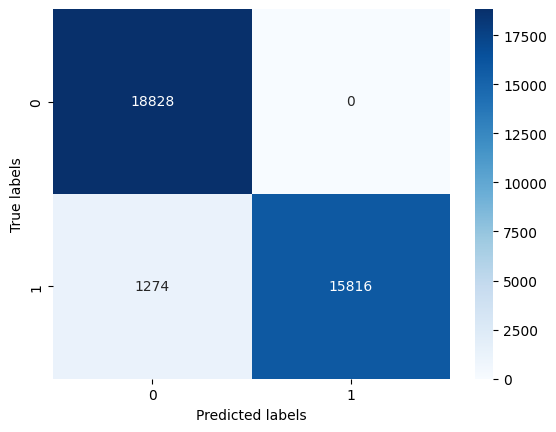

In [52]:
# confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [53]:
# áp dụng vào tập test
y_pred_test = knn_model.predict(X_test_vectorized)
print(np.mean(y_pred_test == y_test))


0.899554565701559


Text(0.5, 23.52222222222222, 'Predicted labels')

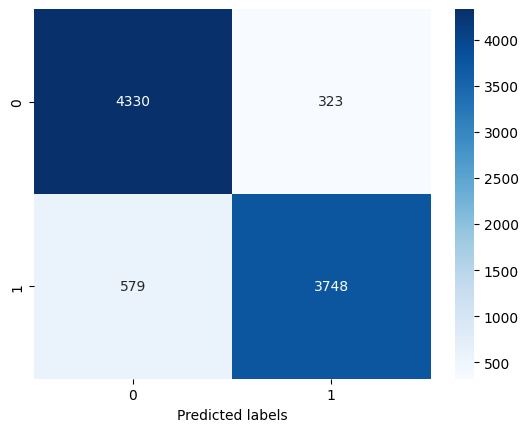

In [54]:

# confusion matrix cho tập test
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')




In [55]:
# Bảng đánh giá số liệu
print(classification_report(y_test, y_pred_test))



              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4653
           1       0.92      0.87      0.89      4327

    accuracy                           0.90      8980
   macro avg       0.90      0.90      0.90      8980
weighted avg       0.90      0.90      0.90      8980



In [56]:
# dự đoán cho một title bất kì và kiểm tra xem nó là fake hay real
title = 'President Declares Mondays as National No-Work Day for Everyone.' # Đây là tin giả
print(label_to_text(model.predict([title])[0]))
title = 'Trump Declares National Emergency.' # Đây là tin thật
print(label_to_text(model.predict([title])[0]))



fake
true
